In [1]:
# Installing Libraries 

In [2]:
! pip install numpy

In [3]:
! pip install pandas


In [4]:
! pip install matplotlib

In [5]:
! pip install seaborn

In [6]:
# Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Read Dataset

In [9]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
#Data Visualization

<AxesSubplot:>

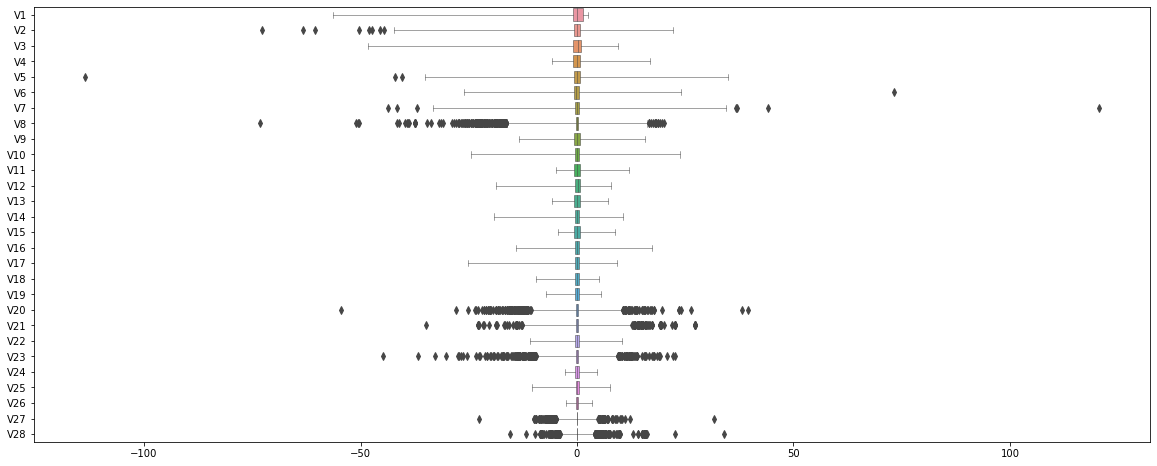

In [11]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df.filter(regex='V\d+'), orient='h', linewidth=0.5, whis=30)

In [12]:
! pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=029a486a32f89bea4a3ab5cd77a59c1886b8cbe641acd96e93035b9f48ece947
  Stored in directory: c:\users\ms201\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


<AxesSubplot:>

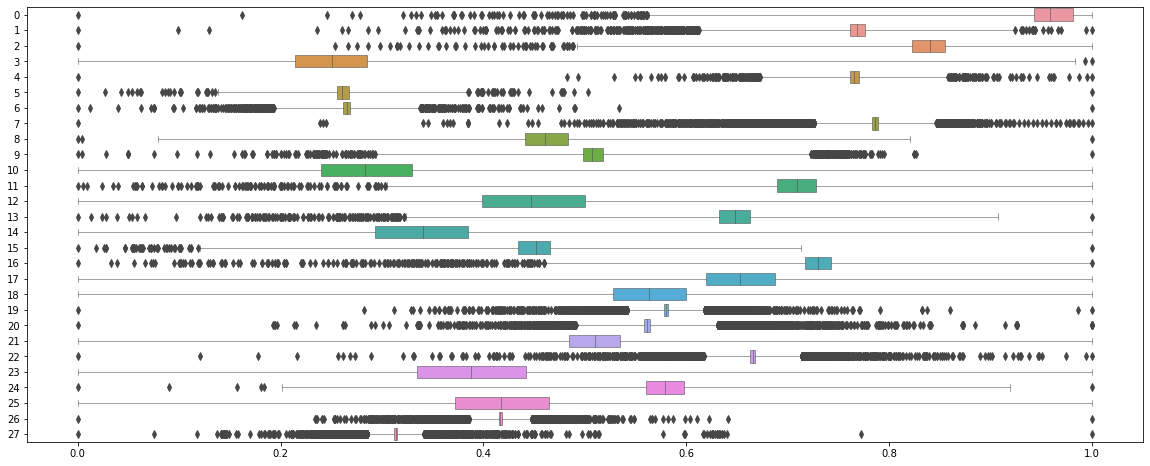

In [13]:
#To ignore outliers, let it normalize and see again.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
only_vs = df.filter(regex='V\d+')
scaled = scaler.fit_transform(only_vs)
plt.figure(figsize=(20,8))
sns.boxplot(data=scaled, orient='h', linewidth=0.5, whis=10)

<AxesSubplot:xlabel='Amount', ylabel='Count'>

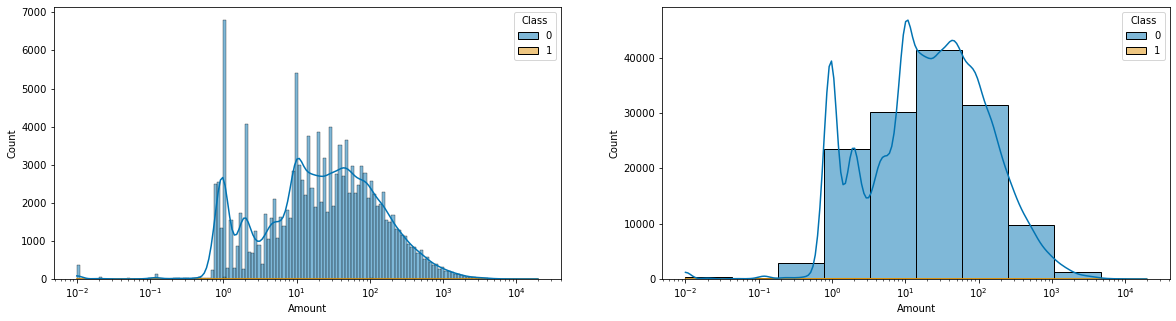

In [14]:
sns.set_palette("colorblind")

fig, axes = plt.subplots(1, 2, figsize=(20,5))
sample_df = df[df["Amount"] > 0].sample(frac=0.5)
sns.histplot(ax=axes[0], data=sample_df, x="Amount", hue="Class", kde=True, log_scale=True)
sns.histplot(ax=axes[1], data=sample_df, x="Amount", hue="Class", kde=True, log_scale=True, bins=10)

<AxesSubplot:ylabel='Amount'>

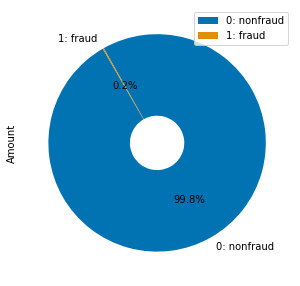

In [15]:
#Can not found bars for class 1 which means fraud. it is few data than non-frauded items. See this pie chart.
ratio_df = df[['Class', 'Amount']].groupby(['Class']).count()
ratio_df.plot.pie(y='Amount', figsize=(5, 5), labels=['0: nonfraud', '1: fraud'], autopct='%.1f%%', startangle=120, wedgeprops={'width': 0.75})

In [16]:
sample_df_class_0 = df[(df["Amount"] > 0) & (df['Class'] == 0)]
sample_df_class_1 = df[(df["Amount"] > 0) & (df['Class'] == 1)]

<AxesSubplot:title={'center':'Amounts of Class 1'}, xlabel='Amount', ylabel='Count'>

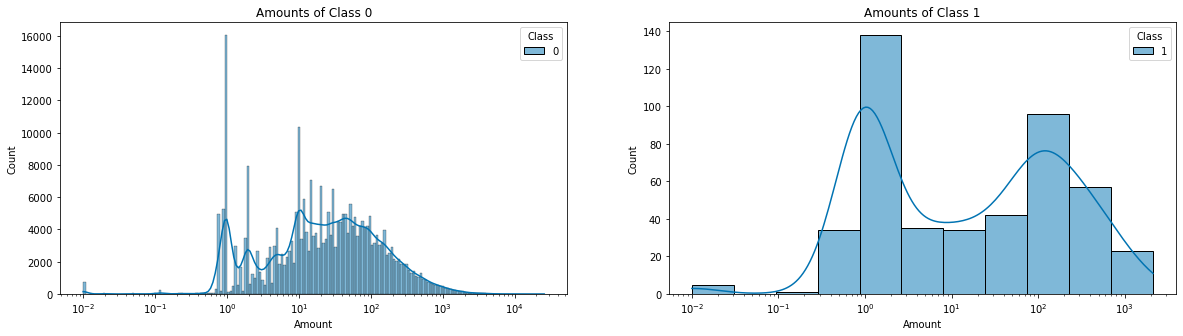

In [17]:
#however I think distribution looks fine in each class
fig, axes = plt.subplots(1, 2, figsize=(20,5))
axes[0].set_title('Amounts of Class 0')
axes[1].set_title('Amounts of Class 1')
sns.histplot(ax=axes[0], data=sample_df_class_0, x="Amount", hue="Class", kde=True, log_scale=True)
sns.histplot(ax=axes[1], data=sample_df_class_1, x="Amount", hue="Class", kde=True, log_scale=True)

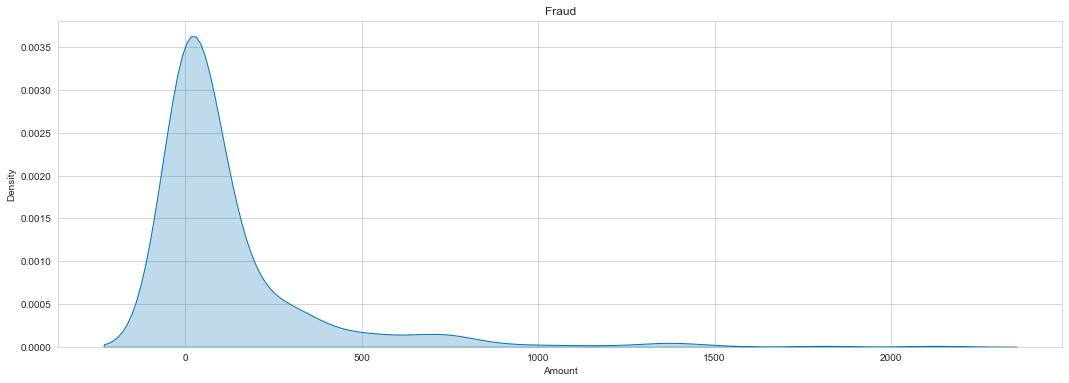

In [18]:
plt.figure(figsize=(18,6))
sns.set_style("whitegrid")
ax = sns.kdeplot(data=sample_df_class_1["Amount"], shade=True)
ax.set(xlabel='Amount', ylabel='Density', title='Fraud')
plt.show()

<AxesSubplot:title={'center':'Correlations with Class'}>

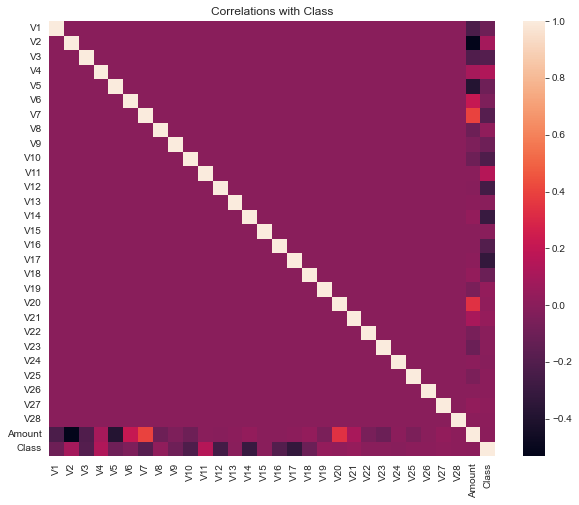

In [19]:
# Lets check the correlation
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.set_title('Correlations with Class')
sns.heatmap(ax=ax, data=df.filter([f'V{i}' for i in range(1, 29)] + ['Amount', 'Class']).corr(), annot=False)

In [20]:
#Predict with Model

#clean up columns and split dataset to train and test

from sklearn.model_selection import train_test_split


def get_train_test_set(df):
    df = df.copy().drop('Time', axis=1)
    features = df.iloc[:, :-1]
    labels = df.iloc[:, -1]
    return train_test_split(features, labels, test_size=0.3, stratify=labels, random_state=0)


transactions_df = pd.read_csv('creditcard.csv')
x_train, x_test, y_train, y_test = get_train_test_set(transactions_df)


In [21]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', max_iter=3000, random_state=0)
lr_clf.fit(x_train, y_train)

LogisticRegression(max_iter=3000, random_state=0, solver='liblinear')

In [22]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

def get_clf_scores(clf, x_test, y_test):
    y_pred = clf.predict(x_test)
    y_pred_proba = clf.predict_proba(x_test)
    return {
        'accuracy_score': accuracy_score(y_test, y_pred),
        'precision_score': precision_score(y_test, y_pred),
        'recall_score': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc_score': roc_auc_score(y_test, y_pred_proba[:,1]),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
    }

In [23]:
get_clf_scores(lr_clf, x_test, y_test)

{'accuracy_score': 0.99916903666772,
 'precision_score': 0.8737864077669902,
 'recall_score': 0.6081081081081081,
 'f1_score': 0.7171314741035857,
 'roc_auc_score': 0.9708676406050225,
 'confusion_matrix': array([[85282,    13],
        [   58,    90]], dtype=int64)}

AttributeError: type object 'RocCurveDisplay' has no attribute 'from_predictions'

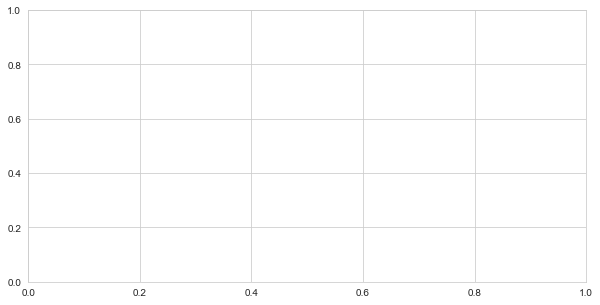

In [24]:
from sklearn import metrics

fig, ax = plt.subplots(1, 1, figsize=(10,5))
metrics.RocCurveDisplay.from_predictions(y_test, lr_clf.decision_function(x_test), name='Logistic Regression', ax=ax)
ax.set_title('ROC curve')
plt.show()

In [ ]:
# Data Preprocessing

plt.figure(figsize=(20,5))
sns.boxplot(data=df[['V1', 'V3', 'V7', 'V9', 'V12', 'V14', 'V17']], orient='h', linewidth=0.5)

In [ ]:
def get_outliers(df, column, weight):
    series = df[column]
    quantile_25 = np.percentile(series.values, 25)
    quantile_75 = np.percentile(series.values, 75)
    iqr = quantile_75 - quantile_25
    lowerbound = quantile_25 - iqr * weight
    upperbound = quantile_75 + iqr * weight
    outliers_index = series[(series < lowerbound) | (series > upperbound)].index
    return outliers_index

In [ ]:
pruned_df = df.copy()
columns = ['V1', 'V3', 'V7', 'V9', 'V12', 'V14', 'V17']
for col in columns:
    out_indices = get_outliers(pruned_df, col, 1.25)
    pruned_df.drop(out_indices, axis=0, inplace=True)

plt.figure(figsize=(20,5))
sns.boxplot(data=pruned_df[['V1', 'V3', 'V7', 'V9', 'V12', 'V14', 'V17']], orient='h', linewidth=0.5)

In [ ]:
def train_and_make_plot(clf, df, ax):
    x_train, x_test, y_train, y_test = get_train_test_set(df)
    
    clf.fit(x_train, y_train)

    metrics.RocCurveDisplay.from_predictions(y_test, clf.decision_function(x_test), name='Logistic Regression', ax=ax)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
axes[0].set_title('Before')
axes[1].set_title('After')
train_and_make_plot(lr_clf, df, axes[0])
train_and_make_plot(lr_clf, pruned_df, axes[1])
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[df.columns[1:-2]])
unscaled = scaler.inverse_transform(scaled)

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(data=scaled, orient='h', linewidth=0.5, whis=10)

In [ ]:
scaler = MinMaxScaler()
v_columns = df.columns[1:-2]
scaled = scaler.fit_transform(df[v_columns])
scaled_df = pd.DataFrame(scaled, columns=v_columns)
# unscaled = scaler.inverse_transform(scaled)
columns = ['V1', 'V3', 'V7', 'V9', 'V12', 'V14', 'V17']
for col in columns:
    out_indices = get_outliers(scaled_df, col, 1.25)
    scaled_df.drop(out_indices, axis=0, inplace=True)

plt.figure(figsize=(20,5))
sns.boxplot(data=scaled_df[['V1', 'V3', 'V7', 'V9', 'V12', 'V14', 'V17']], orient='h', linewidth=0.5)

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(data=unscaled, orient='h', linewidth=0.5, whis=10)

In [ ]:
unscaled = scaler.inverse_transform(scaled_df.values)
unscaled_df = pd.DataFrame(unscaled, columns=v_columns)
scaled_df['Time'] = df['Time']
scaled_df['Amount'] = df['Amount']
scaled_df['Class'] = df['Class']

fig, axes = plt.subplots(1, 2, figsize=(20,5))
axes[0].set_title('Before')
axes[1].set_title('After')
train_and_make_plot(lr_clf, df, axes[0])
train_and_make_plot(lr_clf, scaled_df, axes[1])
plt.show()